# PDIoT Data Cleaning

Hopefully by now you have collected some activity data with the RESpeck device. We will explore some example data and how to can clean it in this notebook. Note that wearing the sensor while sitting or standing upright should give you *APPROXIMATELY* the following values: X=0, Y=-1g, and Z=0.

# Imports

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
from typing import Tuple
import matplotlib.ticker as ticker
from typing import Iterable, Sequence

# Read CSV
Read the CSV file containing the data collected using the Respeck device.
***Important:*** Do not open this file in Excel before reading it into Python, as doing so may round the accelerometer values or alter/remove the column headers, leading to data integrity issues.

The following file is an example recording taken while the person is standing up and breathing normally.

In [100]:
df_stand_normal = pd.read_csv("/content/PDIOT_s12345678_standing_normal_2025-10-07T122359Z_C256D8EAFE86.csv")

In [101]:
df_stand_normal.head()

,receivedPhoneTimestamp,respeckTimestamp,sampleSeqNum,accelX,accelY,accelZ
0,1759839840841,9228056138,0,-0.178711,-1.007141,0.080505
1,1759839840841,9228056138,1,-0.153076,-0.991028,0.089783
2,1759839840841,9228056138,2,-0.153076,-0.989563,0.084900
3,1759839840841,9228056138,3,-0.179443,-0.987610,0.083923
4,1759839840841,9228056138,4,-0.179443,-0.987854,0.089294


The following file is an example recording taken while the person is standing up and hyperventilating.

In [102]:
df_stand_hyperventilate = pd.read_csv("/content/PDIOT_s12345678_standing_hyperventilating_2025-10-07T133143Z_C256D8EAFE86.csv")

In [103]:
df_stand_hyperventilate.head()

,receivedPhoneTimestamp,respeckTimestamp,packetSeqNum,sampleSeqNum,accelX,accelY,accelZ
0,1759843904446,9232118331,13209,0,-0.199463,-0.955139,0.154968
1,1759843904446,9232118331,13209,1,-0.192871,-0.990784,0.142273
2,1759843904446,9232118331,13209,2,-0.186279,-1.003235,0.124939
3,1759843904446,9232118331,13209,3,-0.175537,-0.971741,0.141785
4,1759843904446,9232118331,13209,4,-0.208252,-0.955383,0.155212


The only really **important** columns that are needed in your submission are `receivedPhoneTimestamp`, `accelX`, `accelY`, `accelZ`. You can include the others if you wish to or not.

# Visualise Accelerometer Data
This function, `plot_respeck_accel()`, visualises the raw accelerometer data collected from the Respeck device. It plots the X, Y, and Z acceleration signals against sample indices (representing time) to help you inspect patterns and verify that your data were recorded correctly.

In [104]:
def plot_respeck_accel(
    df: pd.DataFrame,
    cols: Sequence[str] = ("accelX", "accelY", "accelZ"),
    title: str = "Respeck sitting and hyperventilating - accelerometer data",
    base_linewidth: float = 4.0,
    points_per_inch: float = 10.0,
    min_figsize: tuple[float, float] = (8.0, 3.0),
    max_figsize: tuple[float, float] = (30.0, 10.0),
) -> None:
    """
    Plot accelerometer data that you have collected

    Parameters
    ----------
    df
        Input DataFrame containing accelerometer columns and an index that
        represents sample order (e.g., time steps).
    cols
        Column names to attempt to plot. Only existing columns will be used.
    title
        Title for the plot.
    base_linewidth
        Thickness of the plotted lines (in points).
    points_per_inch
        Controls horizontal figure growth relative to the number of rows.
        Effective width ≈ len(df) / points_per_inch, clamped to [min_figsize[0], max_figsize[0]].
    min_figsize, max_figsize
        Bounds for (width, height) in inches to keep figures sensible.
    """

    # --- Validate dataframe -------------------------------------------------
    if df is None or len(df) == 0:
        raise ValueError("The provided DataFrame is empty; nothing to plot.")

    # Keep only columns that actually exist in the DataFrame
    cols_to_plot = [c for c in cols if c in df.columns]
    if not cols_to_plot:
        raise ValueError(
            f"None of the requested columns exist in the DataFrame: {list(cols)}"
        )

    # --- Compute a sensible figure size --------------------------------------
    num_points = len(df)
    est_width = num_points / max(points_per_inch, 1.0)
    width = min(max(est_width, min_figsize[0]), max_figsize[0])
    aspect_ratio = 0.35
    height = width * aspect_ratio
    height = min(max(height, min_figsize[1]), max_figsize[1])

    # --- Create the figure/axes ----------------------------------------------
    fig, ax = plt.subplots(figsize=(width, height))

    # --- Plot each available accelerometer axis ------------------------------
    for col in cols_to_plot:
        # Plot against the DataFrame index (sample number or time).
        ax.plot(df.index, df[col], label=col, linewidth=base_linewidth)

    # --- Legend: only if we actually plotted something -----------------------
    handles, labels = ax.get_legend_handles_labels()
    if handles:
        # Large font size for readability in presentations
        ax.legend(fontsize=18, loc="upper left")

    # --- Titles and axis labels ----------------------------------------------
    ax.set_title(title if title else "Accelerometer Data", fontsize=20)
    ax.set_xlabel("Sample index", fontsize=18)
    ax.set_ylabel("Acceleration", fontsize=18)

    # --- Ticks, rotation, and grid --------------------------------------------
    approx_nticks = max(5, num_points // 10)
    ax.xaxis.set_major_locator(ticker.MaxNLocator(approx_nticks, prune=None))

    ax.tick_params(axis="both", labelsize=14)
    ax.tick_params(axis="x", labelrotation=45)

    ax.grid(axis="x", linestyle="--", linewidth=1.0, alpha=0.6)

    # --- Layout tidy-up and render -------------------------------------------
    plt.tight_layout()
    plt.show()

## Plotting The Example Recording
Each point on the x-axis represents a sample index, which is the position of each recorded data point in time order (i.e., the first sample, second sample, and so on).
The y-axis shows the acceleration values measured along the three axes (X, Y, and Z) of the sensor.

The plot below shows an example recording of accelerometer data collected from the Respeck device while the person was standing up and breathing normally.

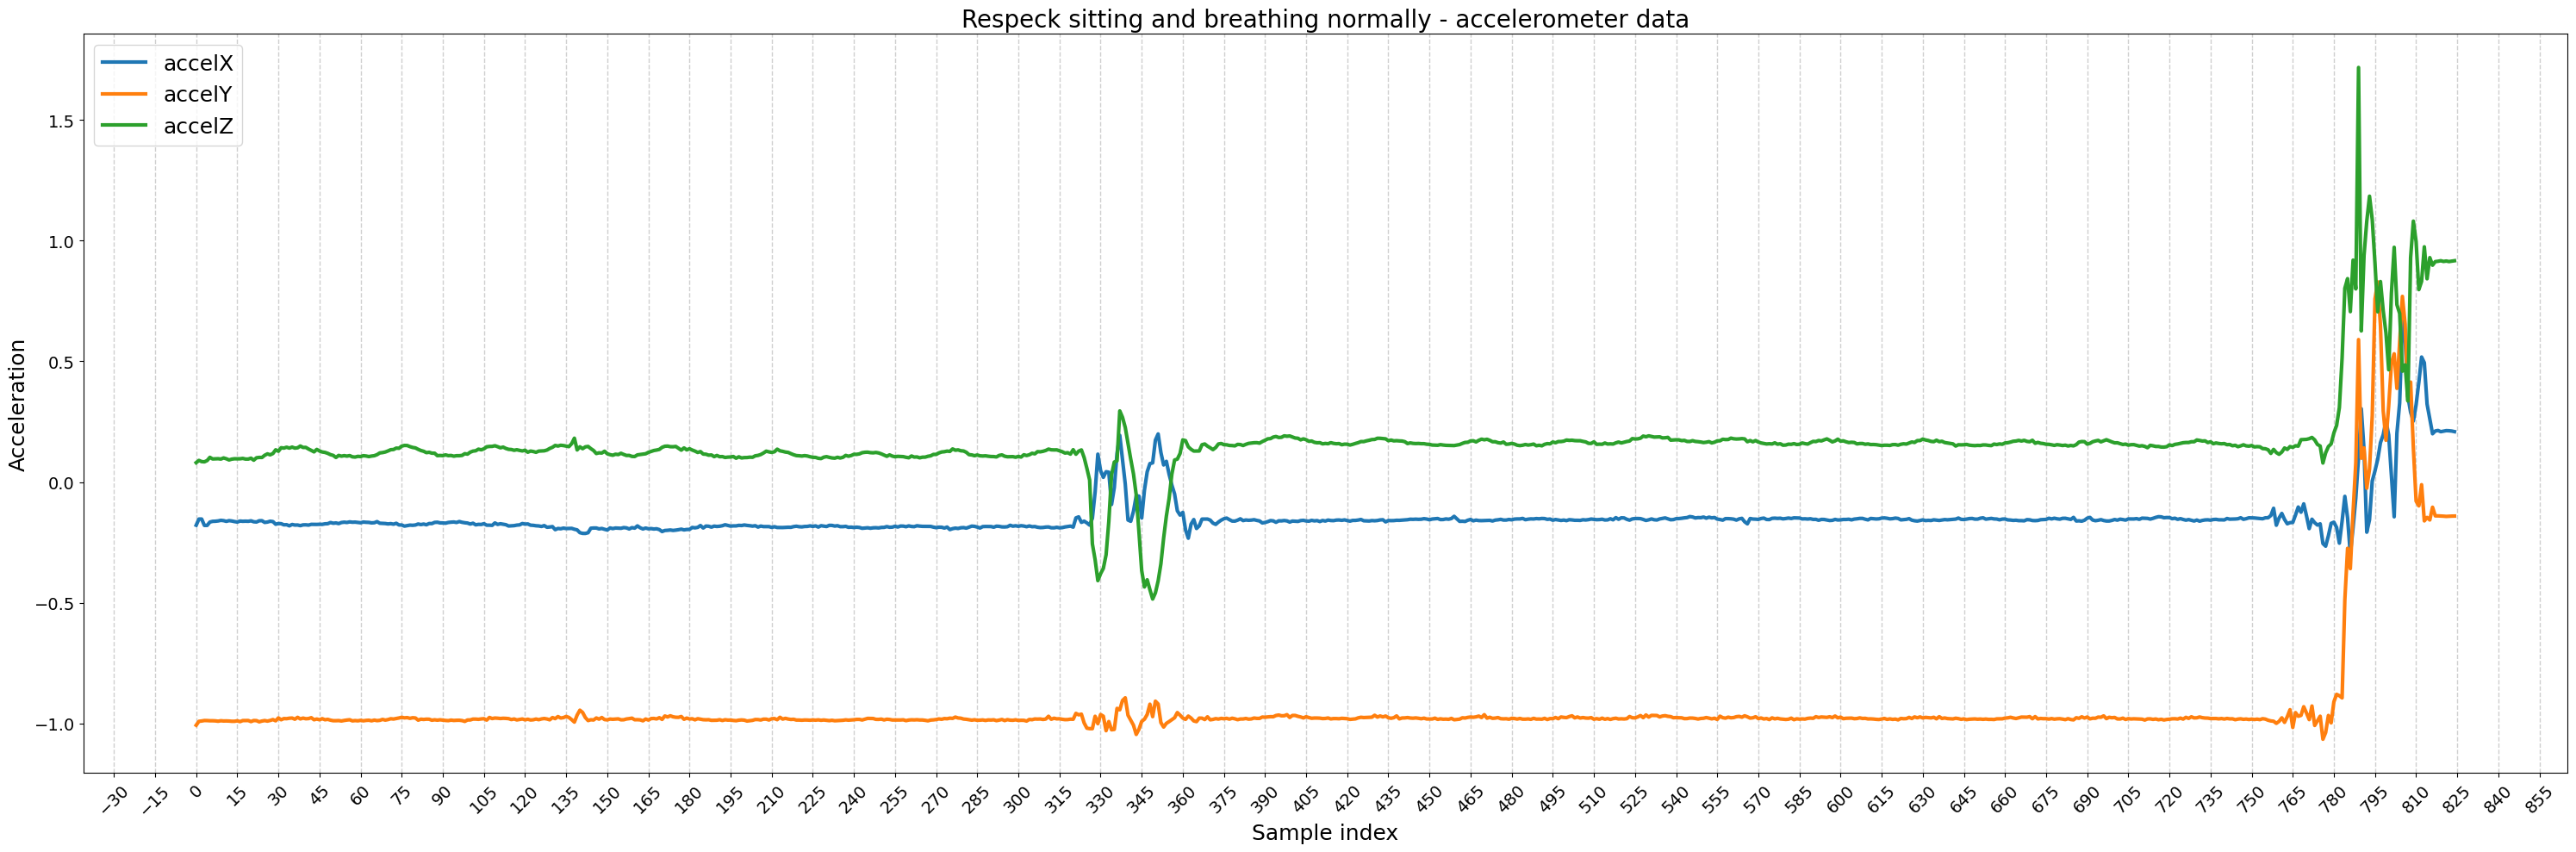

In [105]:
plot_respeck_accel(
     df_stand_normal,
     cols=("accelX", "accelY", "accelZ"),
     title="Respeck sitting and breathing normally - accelerometer data",
     base_linewidth=3.0,
     points_per_inch=10.0
)

The plot below shows an example recording of accelerometer data collected from the Respeck device while the person was standing up and hyperventilating.

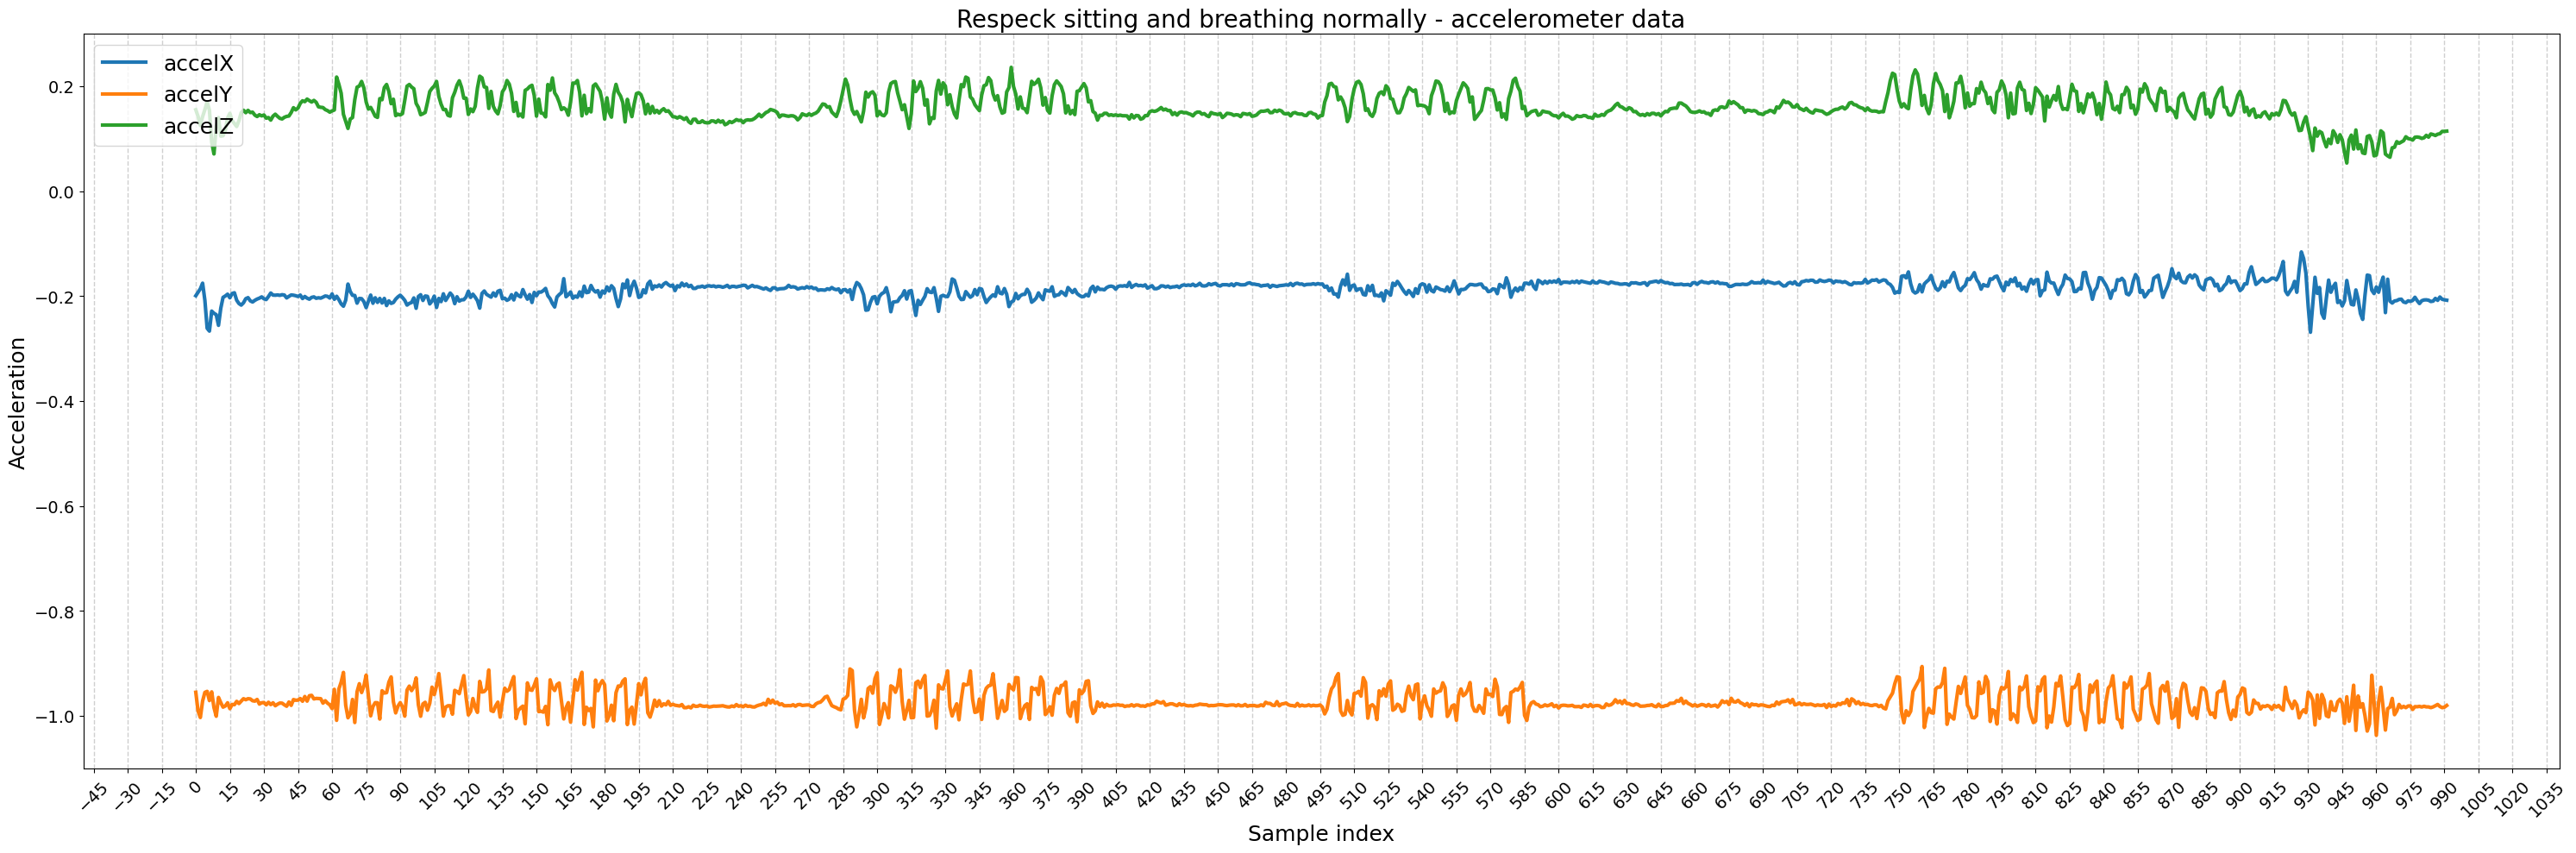

In [106]:
plot_respeck_accel(
     df_stand_hyperventilate,
     cols=("accelX", "accelY", "accelZ"),
     title="Respeck sitting and breathing normally - accelerometer data",
     base_linewidth=3.0,
     points_per_inch=10.0
)

## Data Quality Requirements

If you refer to the instructions for data quality for Coursework 2, the requirements are:

*   Ensure that your clean data file contains the expected data columns
*   Ensure that each of your data files is 30(±2) seconds long
*   Ensure that there are no unnecessary gaps of inactivity in your data recordings
* Ensure that only ONE activity is being performed in each of your data recordings
* Ensure that you have visually verified all your recordings so that the activity starts at the very beginning of the recording and stops at the very end


From the two plots above, we can observe the following:

* Standing and breathing normally: There are two unwanted or invalid segments showing sudden spikes in activity, which clearly do not represent standing still and breathing normally.

* Standing and hyperventilating: The plot generally appears as expected, except for brief gaps of inactivity between periods of hyperventilation. This is common when collecting your own data, as it can be difficult to maintain continuous hyperventilation or coughing for the entire 30 seconds.

In the following sections, we will be removing these segments and also ensure that our data is within 28-30 seconds long.

# Removing Unwanted Segments from the data


### 🧩 Function: `trim_data_ranges(df)`

This function lets you **interactively remove unwanted sections of data** from your DataFrame based on their index values.

When collecting sensor data (e.g., from the Respeck device), there are often short periods where invalid or unwanted data is recorded — for example, if the person moves unexpectedly or the sensor disconnects.  
This function helps you manually trim out those invalid segments before continuing with analysis.

#### **How it works**

1. The function first adds an extra column (`ind`) that stores the current index of each row.  
2. It then asks you **how many data ranges** you’d like to remove.  
3. For each range, you enter:  
   - A **starting index**  
   - An **ending index**  
4. The function removes all rows between those two indexes (inclusive).  


In [107]:
def trim_data_ranges(df):
    """
    Interactively trims ranges of rows from a DataFrame based on index values.

    Parameters:
        df (pd.DataFrame): The DataFrame to trim.

    Returns:
        pd.DataFrame: A new DataFrame with the specified ranges removed.
    """

    # Ensure an index column exists
    df = df.copy()
    df['ind'] = df.index

    # Ask how many ranges to trim
    to_trim = input("How many data ranges would you like to trim? ")
    print("\n")

    for i in range(int(to_trim)):
        print(f"{i+1}. Specify the range of indexes you would like to delete ----------------")

        try:
            range_trim_start = int(input("Starting at index: "))
            range_trim_end = int(input("Ending at index: "))
        except ValueError:
            print("Invalid input. Please enter integer values.\n")
            continue

        # Apply trimming
        df = df[~((df['ind'] >= range_trim_start) & (df['ind'] <= range_trim_end))]
        print(f"Trimmed range {range_trim_start}–{range_trim_end}\n")

    # rest index and remove
    df = df.reset_index(drop=True)
    df = df.drop(columns=['ind'])

    return df


## Standing + Breathing Normally

From visual inspection of the acceleration plot, we can see that there are two segments that needed to be removed:

1.   Values at indices 315 - 375
2.   Values at indices 735 - 830



In [108]:
df_stand_normal_trimmed = trim_data_ranges(df_stand_normal)

How many data ranges would you like to trim? 2


1. Specify the range of indexes you would like to delete ----------------
Starting at index: 315
Ending at index: 375
Trimmed range 315–375

2. Specify the range of indexes you would like to delete ----------------
Starting at index: 735
Ending at index: 830
Trimmed range 735–830



No we can plot the trimmed dataframe to see what it looks like:

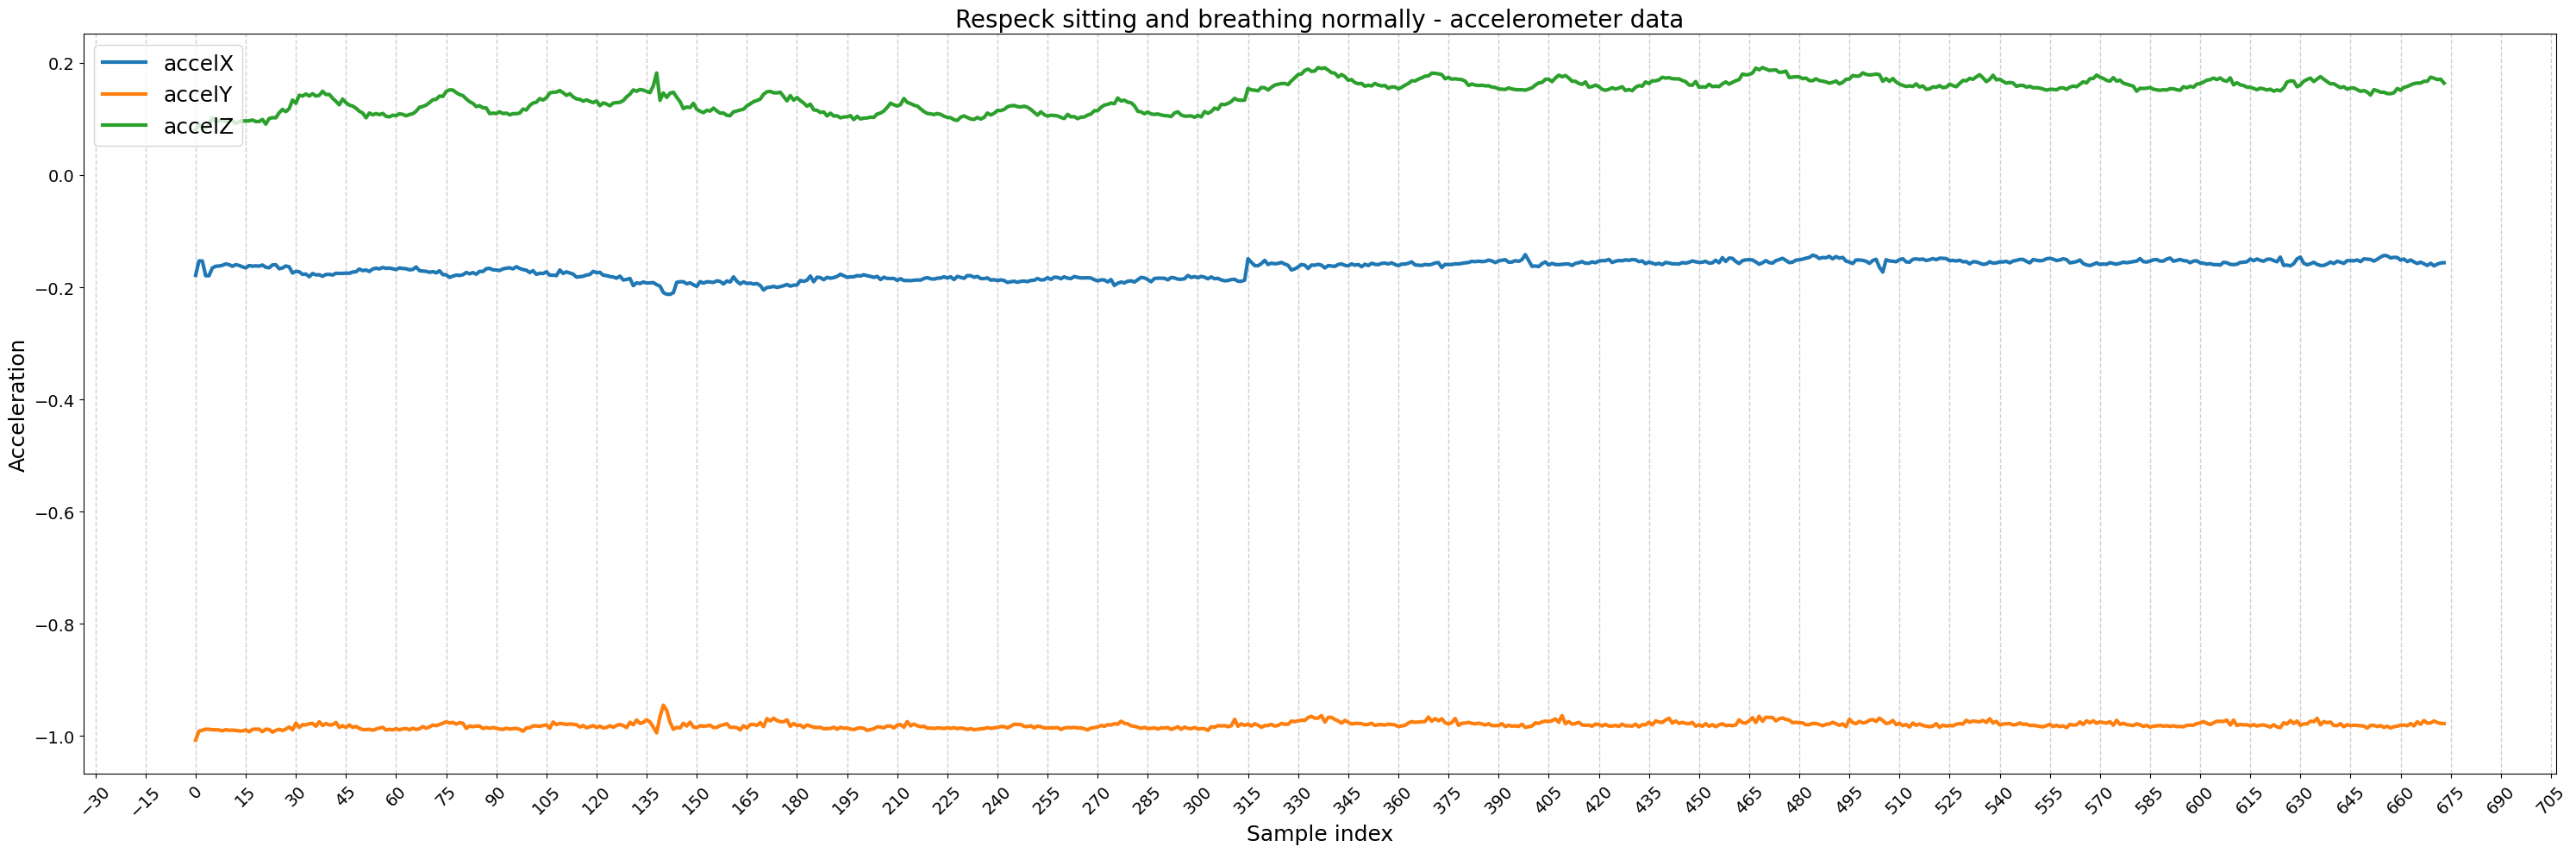

In [109]:
plot_respeck_accel(
     df_stand_normal_trimmed,
     cols=("accelX", "accelY", "accelZ"),
     title="Respeck sitting and breathing normally - accelerometer data",
     base_linewidth=3.0,
     points_per_inch=10.0
)

The unwanted segments have been removed!

# Standing + Hyperventilating

Now, let's do the same with our standing + hyperventilating dataframe. From visual inspection of the acceleration plot, we can see that there are five segments that needed to be removed:

1.   Values at indices 0 - 60
2.   Values at indices 200 - 280
3.   Values at indices 400 - 495
4.   Values at indices 590 - 735
5.   Values at indices 975 - 990

In [110]:
df_stand_hyperventilate_trimmed = trim_data_ranges(df_stand_hyperventilate)

How many data ranges would you like to trim? 5


1. Specify the range of indexes you would like to delete ----------------
Starting at index: 0
Ending at index: 60
Trimmed range 0–60

2. Specify the range of indexes you would like to delete ----------------
Starting at index: 200
Ending at index: 280
Trimmed range 200–280

3. Specify the range of indexes you would like to delete ----------------
Starting at index: 400
Ending at index: 495
Trimmed range 400–495

4. Specify the range of indexes you would like to delete ----------------
Starting at index: 590
Ending at index: 735
Trimmed range 590–735

5. Specify the range of indexes you would like to delete ----------------
Starting at index: 975
Ending at index: 990
Trimmed range 975–990



No we can plot the trimmed dataframe to see what it looks like:

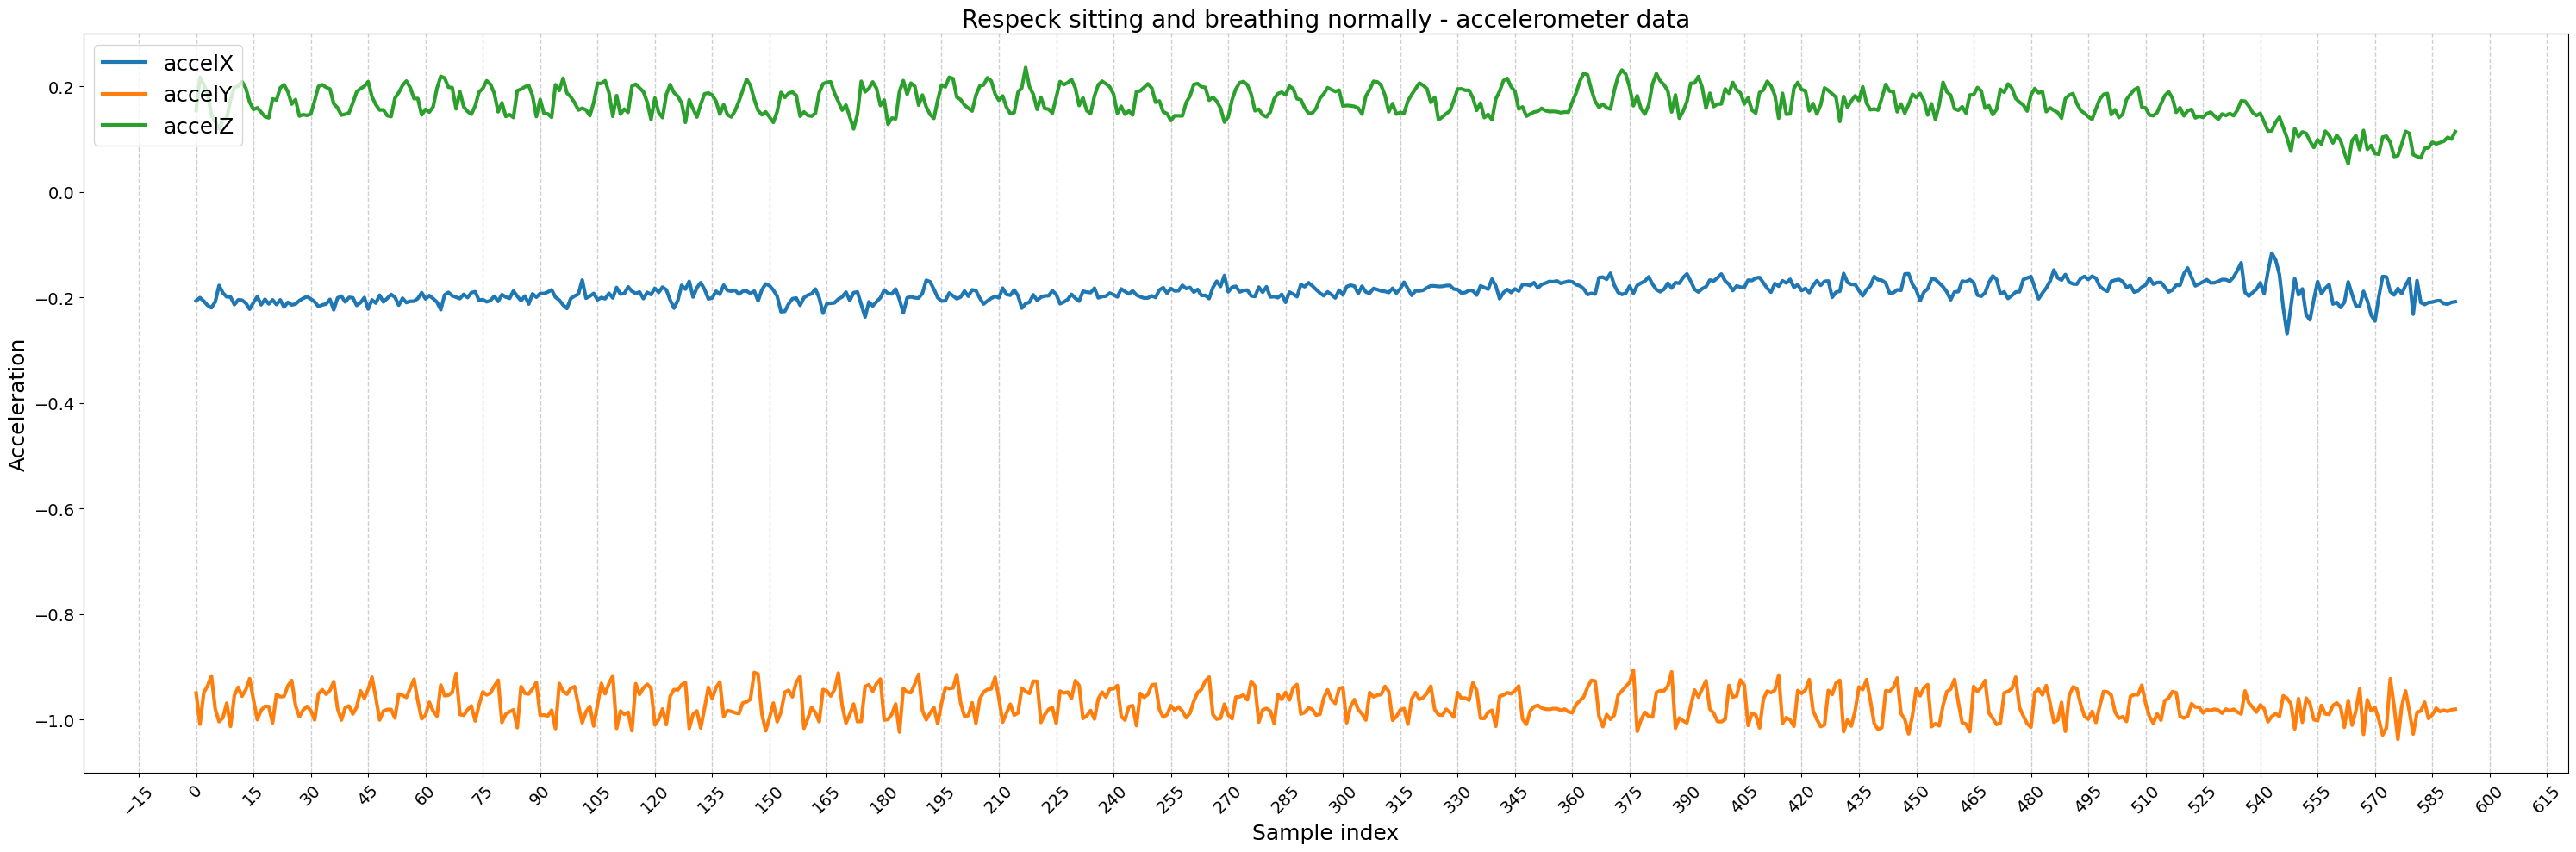

In [111]:
plot_respeck_accel(
     df_stand_hyperventilate_trimmed,
     cols=("accelX", "accelY", "accelZ"),
     title="Respeck sitting and breathing normally - accelerometer data",
     base_linewidth=3.0,
     points_per_inch=10.0
)

The normal breathing segments have now been removed!

# Trimming the Data to 28–32 Seconds

An important requirement of the data collection is that your data should be between **28–32 seconds long**.  
Since the RESpeck device has a sampling frequency of **12.5 Hz**, it records **12.5 samples per second**.

To determine how many samples correspond to 28–32 seconds, we can calculate:

$$
\text{Number of samples} = \text{Time (s)} \times \text{Sampling frequency (Hz)}
$$

For **28 seconds**:

$$
28 \times 12.5 = 350 \text{ samples}
$$

For **32 seconds**:

$$
32 \times 12.5 = 400 \text{ samples}
$$

**Therefore, your dataset should contain between 350 and 400 samples** to meet the acceptable 28–32 second range.

If your dataset contains **more than 400 samples**, you’ll need to **trim** the extra data points (e.g., using the `trim_data_ranges()` function).  
If it contains **fewer than 350 samples**, you may need to **recollect the data** to ensure it meets the minimum duration.


In [112]:
def calculate_duration(df, sampling_freq=12.5):
    """
    Calculates and prints the duration (in seconds) of a dataset
    based on the number of samples and the sampling frequency.
    Also estimates how many samples need to be trimmed or added (if applicable).

    Parameters:
        df (pd.DataFrame): The DataFrame containing your RESpeck data.
        sampling_freq (float): Sampling frequency in Hz (samples per second).
                               Default is 12.5 Hz for RESpeck.

    Returns:
        float: The calculated duration in seconds.
    """
    num_samples = len(df)
    duration_seconds = num_samples / sampling_freq

    # Expected number of samples for the valid duration range
    min_samples = int(28 * sampling_freq)
    max_samples = int(30 * sampling_freq)

    print(f"Number of samples in DataFrame: {num_samples}")
    print(f"Estimated duration: {duration_seconds:.2f} seconds")
    print(f"Expected sample range: {min_samples}–{max_samples} samples")

    # Valid range in seconds
    min_duration = 28
    max_duration = 32

    # Check duration and provide guidance
    if min_duration <= duration_seconds <= max_duration:
        print("✅ Duration is within the required 28–32 second range.")
    elif duration_seconds < min_duration:
        missing_samples = int((min_duration - duration_seconds) * sampling_freq)
        print("⚠️ Duration is too short — consider recollecting data.")
        print(f"   You need approximately {missing_samples} more samples.")
    else:
        # Calculate trimming range
        trim_to_min = int((duration_seconds - max_duration) * sampling_freq)
        trim_to_max = int((duration_seconds - min_duration) * sampling_freq)
        print("⚠️ Duration is too long — consider trimming the data.")
        print(f"   Trim between {trim_to_min} and {trim_to_max} samples to bring it within 28–32 seconds.")


Now let's see the length of our data for standing and breathing normally:

In [113]:
calculate_duration(df_stand_normal_trimmed)

Number of samples in DataFrame: 674
Estimated duration: 53.92 seconds
Expected sample range: 350–375 samples
⚠️ Duration is too long — consider trimming the data.
   Trim between 274 and 324 samples to bring it within 28–32 seconds.


Now let's see the length of our data for standing and hyperventilating:

In [114]:
calculate_duration(df_stand_hyperventilate_trimmed)

Number of samples in DataFrame: 592
Estimated duration: 47.36 seconds
Expected sample range: 350–375 samples
⚠️ Duration is too long — consider trimming the data.
   Trim between 192 and 242 samples to bring it within 28–32 seconds.


From running `calculate_duration()`, we can see that both of our dataframes exceed the 30 seconds limit and need to be trimmed. You can either trim the beginning or end of your dataframe.


In [115]:
def trim_samples(df, n, side="end"):
    """
    Trim exactly n samples from the DataFrame.

    side: "start" to drop the first n rows, "end" to drop the last n rows.
    """
    if n <= 0:
        return df.reset_index(drop=True)
    n = min(n, len(df))  # avoid negative/empty slicing surprises
    if side == "start":
        return df.iloc[n:].reset_index(drop=True)
    elif side == "end":
        return df.iloc[:-n].reset_index(drop=True)
    else:
        raise ValueError('side must be "start" or "end"')


In [116]:
df_stand_normal_trimmed = trim_samples(df_stand_normal_trimmed, 280, side="end")
df_stand_hyperventilate_trimmed = trim_samples(df_stand_hyperventilate_trimmed, 200, side="end")

Now, let's check the duration of our dataframes again after trimming:

In [117]:
calculate_duration(df_stand_normal_trimmed)

Number of samples in DataFrame: 394
Estimated duration: 31.52 seconds
Expected sample range: 350–375 samples
✅ Duration is within the required 28–32 second range.


In [118]:
calculate_duration(df_stand_hyperventilate_trimmed)

Number of samples in DataFrame: 392
Estimated duration: 31.36 seconds
Expected sample range: 350–375 samples
✅ Duration is within the required 28–32 second range.


Now that our dataframes are within 28-32 seconds, let's plot the result one last time:

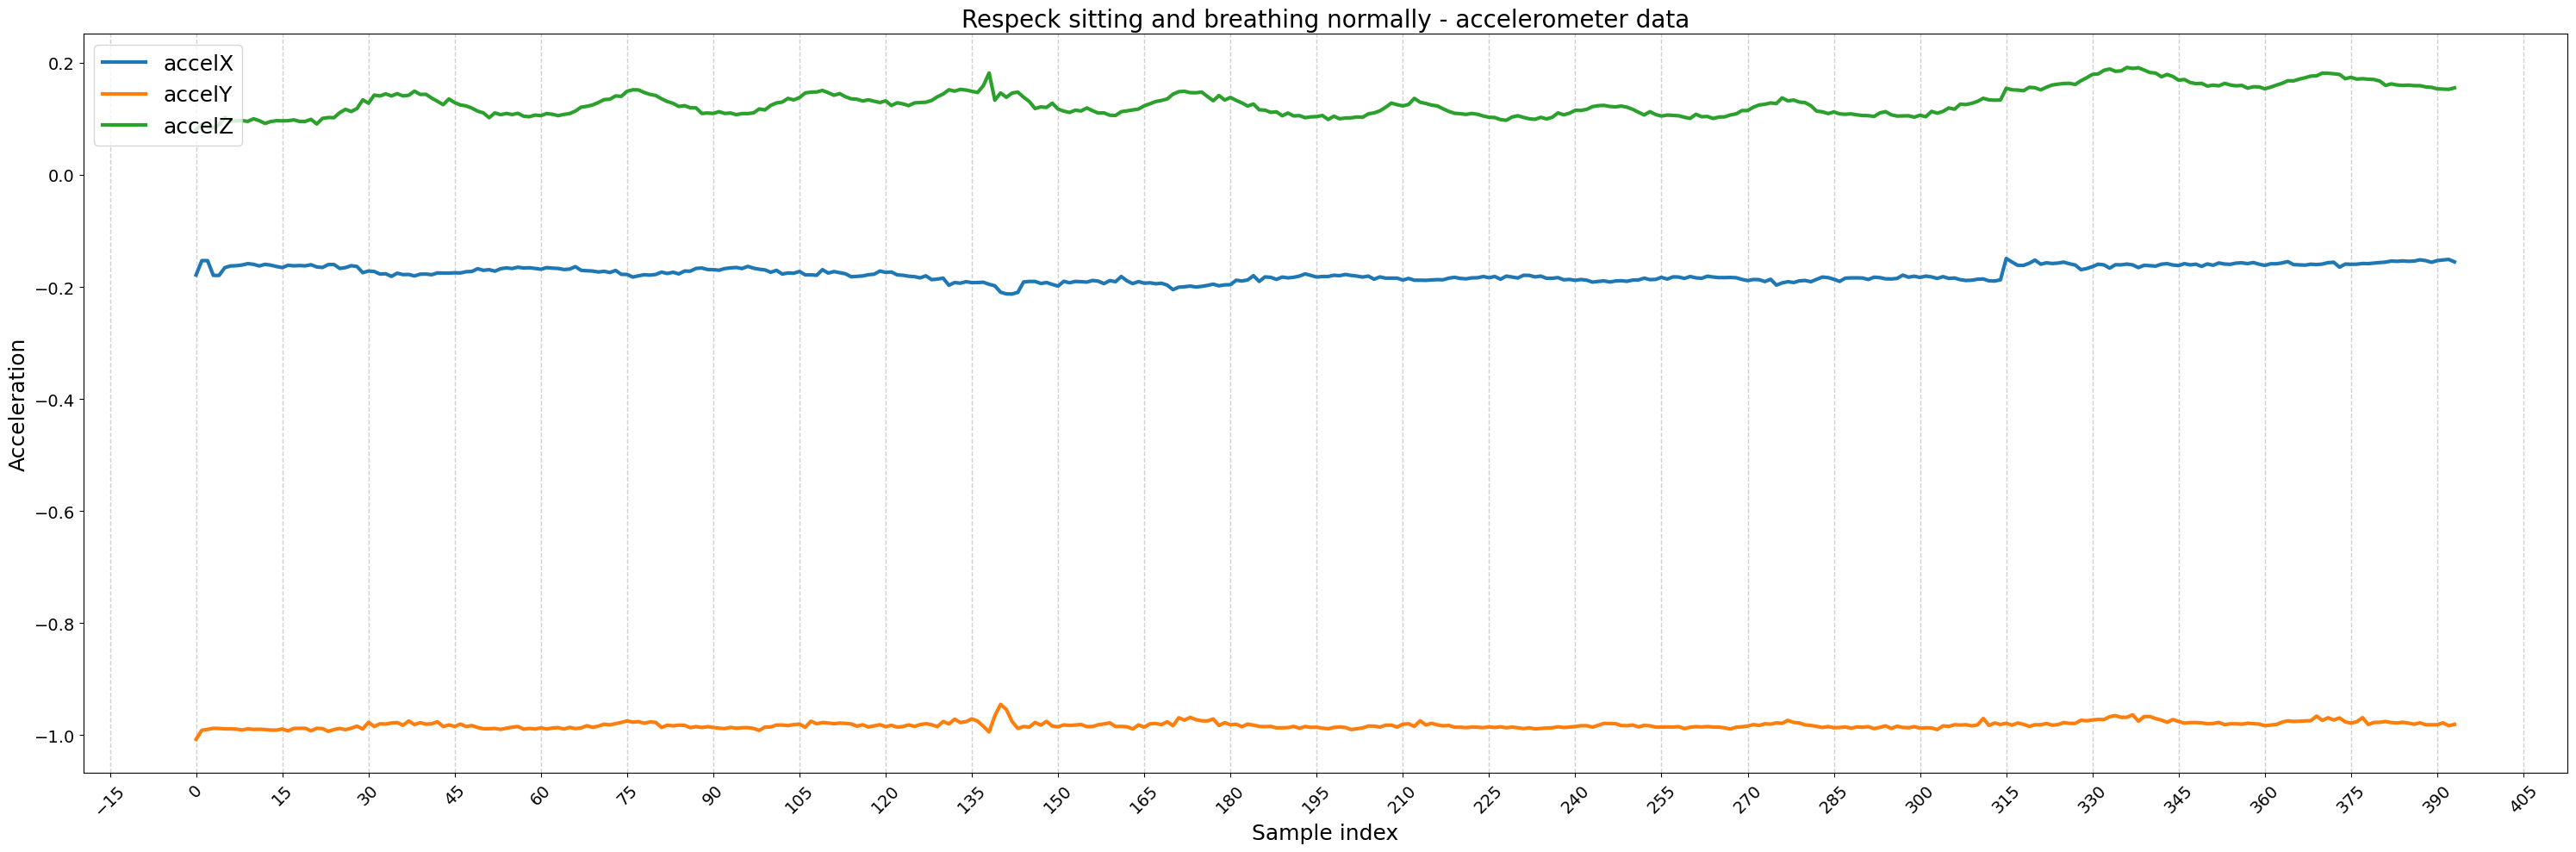

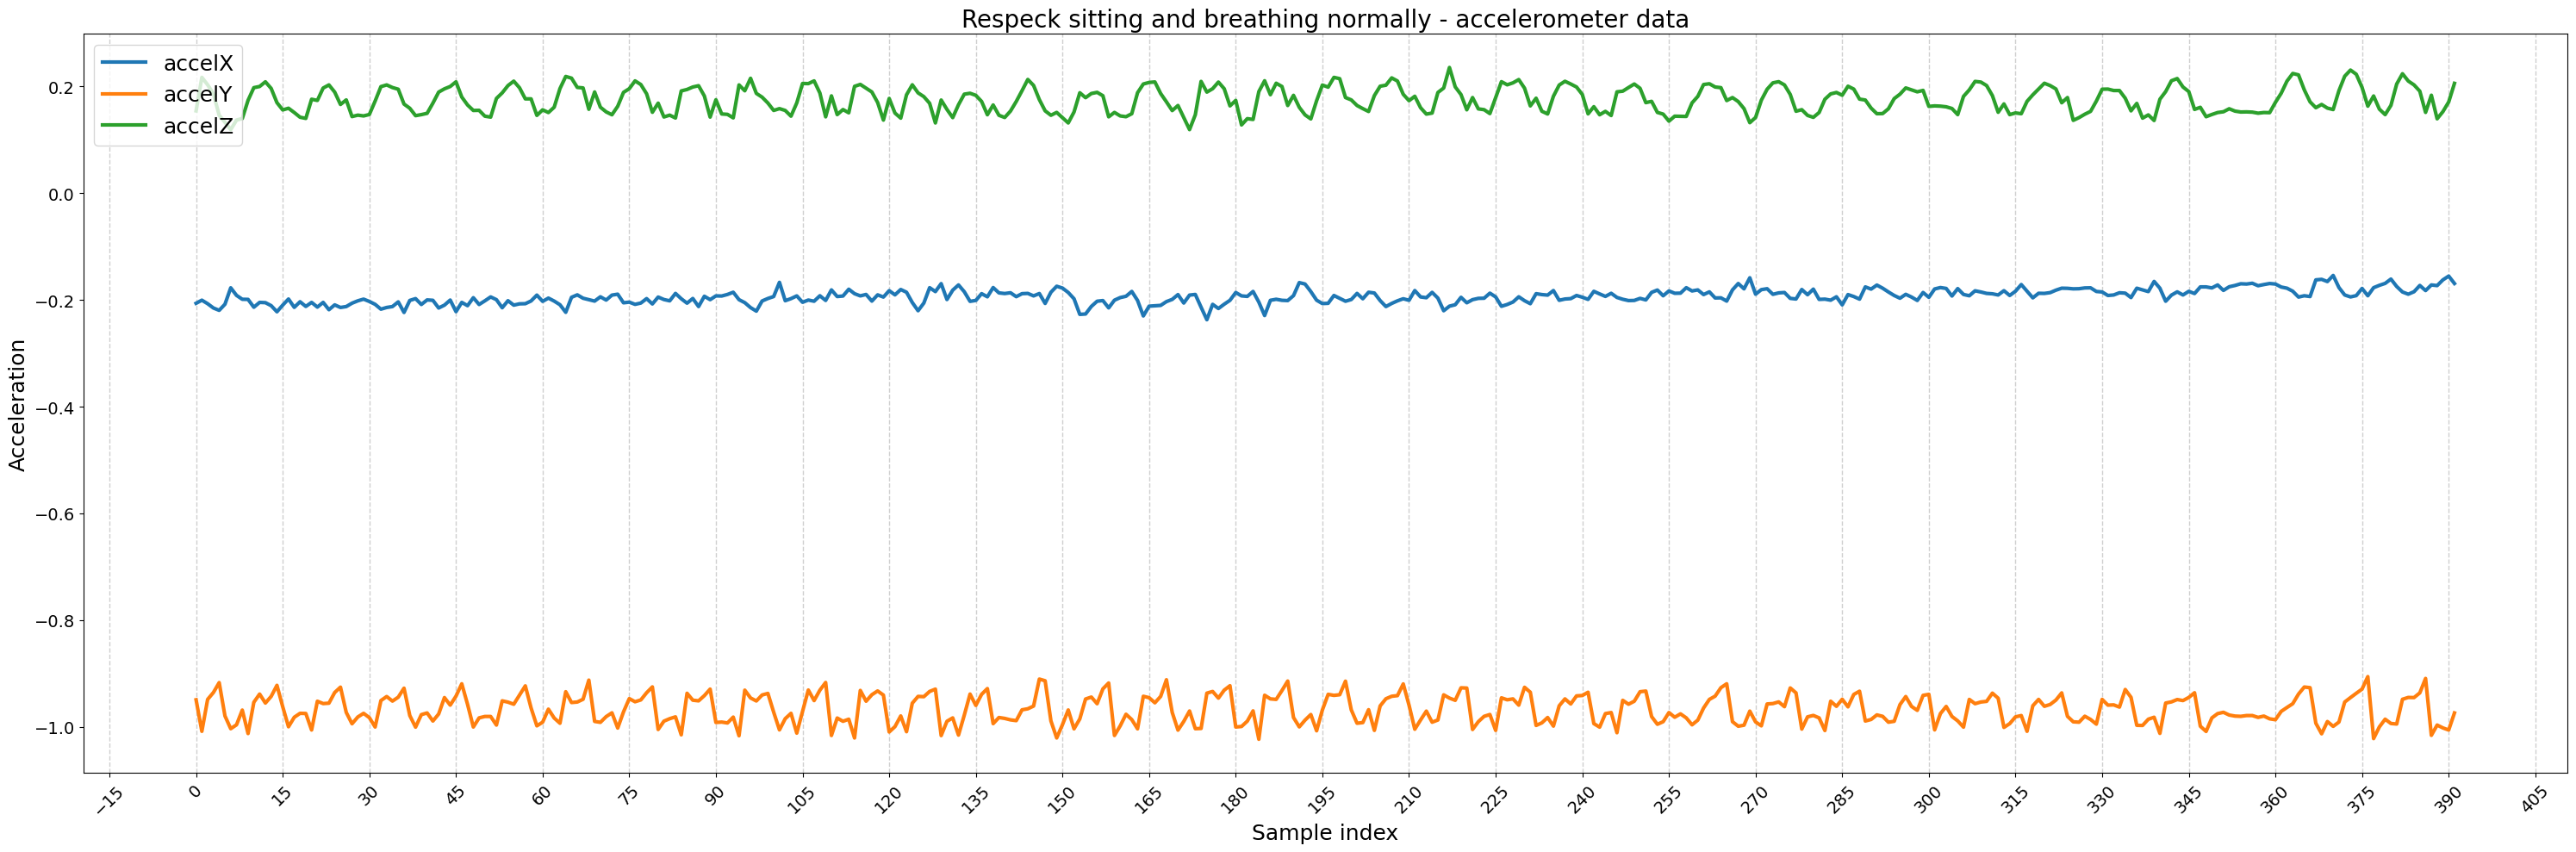

In [119]:
plot_respeck_accel(
     df_stand_normal_trimmed,
     cols=("accelX", "accelY", "accelZ"),
     title="Respeck sitting and breathing normally - accelerometer data",
     base_linewidth=3.0,
     points_per_inch=10.0
)

plot_respeck_accel(
     df_stand_hyperventilate_trimmed,
     cols=("accelX", "accelY", "accelZ"),
     title="Respeck sitting and breathing normally - accelerometer data",
     base_linewidth=3.0,
     points_per_inch=10.0
)

# Renaming your files and save

Now both of our dataframes meet the requirements for data collection and are ready for submission. We can save the dataframes.

Please follow the following naming convention for your files:

`PDIOT_{studentUUN}_{activityType}_{subActivityType}_{timestamp}.csv`



You can get the timestamp via the following:

In [125]:
ts = pd.to_datetime(df_stand_normal_trimmed.receivedPhoneTimestamp[0], unit='ms')
formatted_timestamp_normal = ts.strftime("%d-%m-%Y_%H-%M-%S")
formatted_timestamp_normal

'07-10-2025_12-24-00'

In [126]:
ts = pd.to_datetime(df_stand_hyperventilate_trimmed.receivedPhoneTimestamp[0], unit='ms')
formatted_timestamp_hyperventilate = ts.strftime("%d-%m-%Y_%H-%M-%S")
formatted_timestamp_hyperventilate

'07-10-2025_13-31-46'

In [127]:
df_stand_normal_trimmed.to_csv(f"/content/PDIOT_s12345678_standing_normal_{formatted_timestamp_normal}.csv", index=False)
df_stand_hyperventilate_trimmed.to_csv(f"/content/PDIOT_s12345678_standing_hyperventilating_{formatted_timestamp_hyperventilate}.csv", index=False)

# End of Lab 3

You have now reached the end of Lab 3. You can use the code provided here to building your cleaning and preprocessing pipeline for your own data for submission to Coursework 2.